<font size="+5">#05. Hiperparametros del Modelo</font>

# Cargar Datos

> Usamos una tabla del _[Respositorio de Datos de Machine Learning UCI](https://archive.ics.uci.edu/ml/datasets/adult)_. Esta tabla resume la información de personas que ganan más de 50,000 al año o menos. Por tanto, nuestro objetivo es desarrollar un modelo que calcule mejor si una persona gana por encima o por debajo de dicho umbral. La columna a predecir es la última.
>
> PD: Si te interesa conocer el nombre de las variables, puedes ir al enlace de del repositorio.

```python
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()
```

> Copiamos y pegamos en la siguiente celda las líneas de código que aparecen justo arriba para descargar los datos de internet y almacenar la tabla en un `DataFrame` con el que trabajaremos durante la práctica.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [19]:

pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, header=None, na_values=' ?')
df.rename(columns={14: 'target'}, inplace=True)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Seleccionar Variables

> 1. `Variable Objetivo y`
> 2. El resto las usaremos como `Variables Explicativas X`

In [20]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
X_train.dtypes

0      int64
1     object
2      int64
3     object
4      int64
5     object
6     object
7     object
8     object
9     object
10     int64
11     int64
12     int64
13    object
dtype: object

In [23]:
list_columns_cat = list(X_train.select_dtypes("object").columns)
print(list_columns_cat)

[1, 3, 5, 6, 7, 8, 9, 13]


In [35]:
ohe = ce.OneHotEncoder(cols=list_columns_cat)
model_hencoder = ohe.fit(X_train,y_train)

In [36]:
model_hencoder

OneHotEncoder(cols=[1, 3, 5, 6, 7, 8, 9, 13])

In [43]:
X_train_t = model_hencoder.transform(X_train,y_train).values
X_test_t = model_hencoder.transform(X_test,y_test).values

In [44]:
X_train_t

array([[34,  1,  0, ...,  0,  0,  0],
       [48,  1,  0, ...,  0,  0,  0],
       [23,  0,  1, ...,  0,  0,  0],
       ...,
       [18,  0,  0, ...,  0,  0,  0],
       [50,  1,  0, ...,  0,  0,  0],
       [34,  0,  0, ...,  0,  0,  0]])

# Entrenar Modelo `DecisionTreeClassifier()` por Defecto

> Usaremos los hiperparámetros que vienen por defecto (dejamos el paréntesis en blanco).

In [45]:
model = DecisionTreeClassifier()

In [46]:
model.fit(X_train_t,y_train)

DecisionTreeClassifier()

## Realidad vs Predicciones

> ¿Cómo de bueno es el modelo en los datos de **entrenamiento**?¿Y en los datos de **testeo**?

In [47]:
model.score(X_train_t, y_train)

1.0

In [48]:
model.score(X_test_t, y_test)

0.8115467294503019

## Visualizar Modelo

> - Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> - Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

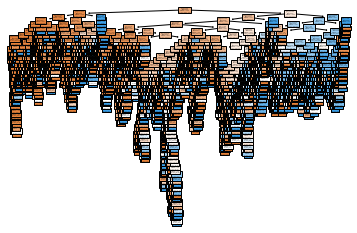

In [50]:
plot_tree(model,filled= True);

## Interpretar Modelo

> ¿Por qué el modelo es muy bueno en los datos de entrenamiento y tan malo en los datos de testeo?

# Entrenar Modelo `DecisionTreeClassifier()` con Diferentes Hiperparámetros

> - Debemos emplear el **objeto** `GridSearchCV()` para encontrar los mejores Hiperparámetros que nos den mejores resultados en datos que el modelo no conocía: enl los datos de testeo.
>
> Si queremos ver los hiperparámetros del modelo, ejecutaremos: `model.get_params()`
>
> Si queremos ver los posibles valores que deben tener los hiperpámetros, podemos ver la ayuda `shift + tab` sobre el paréntesis del objeto `DecisionTreeClassifier()`.

In [36]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [52]:
CV = GridSearchCV(estimator=model, param_grid={'min_samples_leaf': [50, 100, 200, 400, 800, 1600],'max_depth': [5, 15, 25, 40]}, verbose=2, n_jobs=2)

In [53]:
CV.fit(X_train_t, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'max_depth': [5, 15, 25, 40],
                         'min_samples_leaf': [50, 100, 200, 400, 800, 1600]},
             verbose=2)

In [54]:
CV.best_params_

{'max_depth': 15, 'min_samples_leaf': 100}

In [55]:
CV.best_score_

0.8513074688153305

In [56]:
CV.score(X_train_t,y_train)

0.8594243594243595

In [57]:
CV.score(X_test_t,y_test)

0.8557682464940116

## Realidad vs Predicciones

## Visualizar Modelo

> - Usaremos la función `plot_tree()`, que se encuentra en el módulo `tree` de la librería `sklearn`
> - Podéis usar `shift + tab` para que `Python` os explique cómo usar la función `plot_tree()`

In [61]:
model1 = DecisionTreeClassifier(min_samples_leaf=100, max_depth=15)

In [62]:
model1.fit(X_train_t, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=100)

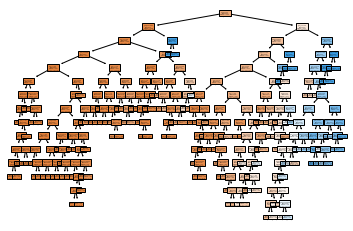

In [64]:
plot_tree(model1, filled=True);

## Interpretar Modelo

> ¿Por qué el modelo es muy bueno en los datos de entrenamiento y tan malo en los datos de testeo?¿Por qué ha cambiado tanto la precisión en los datos de testeo al haber usado diferentes hiperparámetros?

# Configurar Hiperparámetros de Otros Modelos

## K Nearest Neighbours

> Aquí tan solo debemos configurar el número K de vecinos a tener en cuenta.

In [67]:
model = KNeighborsClassifier()

In [71]:
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [74]:
cv_kn = GridSearchCV(estimator=model, param_grid={'n_neighbors': [5, 15, 25, 40, 70, 95, 120]})

In [75]:
cv_kn.fit(X_train_t, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 15, 25, 40, 70, 95, 120]})

In [76]:
cv_kn.best_params_

{'n_neighbors': 25}

## Support Vector Machines

> _Durante la corrección te explicare en detalle el funcionamiento de este algoritmo. Mientras tanto, podéis ver el vídeo que usaré para que os relacionéis con los conceptos:_
>
> - https://www.youtube.com/watch?v=efR1C6CvhmE
>
> Además de un script en Internet:
>
> - https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
>
> Cambiad tan solo los hiperparámetros del coste `C` y el tipo de `kernel`. En el último enlace veréis los posibles valores con los que podemos jugar. Además, podréis ver qué significan cada uno de los hiperparámetros solicitando ayuda con `shift + tab`.

In [51]:
sv = SVC()

In [52]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [58]:
cv_sv = GridSearchCV(estimator=sv, param_grid={'kernel': ['linear', 'rbf']},
                    verbose=2)

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
scaler = MinMaxScaler()

In [61]:
X_train_t_esc = scaler.fit_transform(X_train_t)

In [62]:
cv_sv.fit(X_train_t_esc,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END ......................................kernel=linear; total time=   9.9s
[CV] END ......................................kernel=linear; total time=  10.0s
[CV] END ......................................kernel=linear; total time=   9.8s
[CV] END ......................................kernel=linear; total time=   9.9s
[CV] END ......................................kernel=linear; total time=  10.1s
[CV] END .........................................kernel=rbf; total time=  12.4s
[CV] END .........................................kernel=rbf; total time=  12.6s
[CV] END .........................................kernel=rbf; total time=  12.4s
[CV] END .........................................kernel=rbf; total time=  12.5s
[CV] END .........................................kernel=rbf; total time=  12.6s


GridSearchCV(estimator=SVC(), param_grid={'kernel': ['linear', 'rbf']},
             verbose=2)

In [ ]:
cv_sv.best_params

# Objetivos Alcanzados

_Haz doble click sobre esta celda y pon una `X` dentro de las casillas [X] si crees que has superado los objetivos:_

- [X] Entender la importancia de la precisión de nuestro modelo en datos con los que no ha sido entrenado para evitar el sobreentrenamiento (**Ovefitting**).
- [X] Entender qué significan los hiperparámetros y cómo pueden llegar a modificar un modelo.
- [X] Importancia de la **aleatoriedad** como pieza fundamental de la estadística porque reduce el sesgo.